Finding pattern in FIFA . gain full cluster implementation to give you a value for the centroids. K means is unsupervise, we are feeding data into a algorithm for pattern finding, this is not predicting like regression. 

K is the amount of cluster, usually 5

1. specify the cluster
2. initialize centroid (the data point in the center of the cluster) for each cluster
3. use closest centroid to each data point 
4. update the centroids base on geometric mean 
5. repeat: use closest centroid to each data point and update the centroi until centroids stop changing.

### Goal: we are going to cluster the players.

1. find overall rating, potential rating, their value so far, their wage, and age

In [3]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
players = pd.read_csv("players_22.csv")

In [5]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [7]:
#define a list of all the features for clustering
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [8]:
#if there's a null or mmissing values, then drop it
players = players.dropna(subset=features)

In [9]:
data = players[features].copy()

In [10]:
data
#our data now contain our 5 features and no nulls

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


we can now go ahead and start implementing our k-means clustering algorithm

1. scale the data (the data need to go from a certain value like 0 to 1) this is to normalize the columns so it will be treated equally
2. Initialize random centroids ()
3. Label each data point depend on how far it is from the cluster
4. Update centroids (look at each player and label and find center point)
5. repeat 3 and 4 until centroids stop changing


## Scaling using Min Max
1. we will subtract the minimum value from each value making the smallest 0
2. Then we will divide it by the range to rescale everything from 0 to 1
3. We will then multiply it by 9 to rescale everything from 0 to 9
4. We will add 1 so it be an increments of 1. 



In [20]:
data = ((data -data.min())/(data.max()-data.min()))*9+1

In [22]:
data.describe()
# We can see that everything is now scaled between 1 and 10
# We have preserve the variance in our original
#

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [23]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667



#we now need to create a centroid which contain a value for each features

###centroid = data.apply(lambda x :float(x.sample())) ###

#1. This will be creating a single centroid to iterate through each columns in the data

#2. the sample will select a single value at random to sample from each column then turn to a float


In [28]:
#from the example above we will create a function for a multiple centroid base on k 
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis =1)  #this will combine individual panda series into a df

In [31]:
centroids = random_centroids(data, 5)  #this wil define the cluster number

In [33]:
centroids
#now each columns is a centroid, each role is a different feature

,0,1,2,3,4
overall,4.717391,4.913043,6.673913,2.956522,4.130435
potential,4.521739,4.521739,5.304348,5.891304,6.869565
wage_eur,1.115880,2.480687,1.090129,1.000000,1.064378
value_eur,1.039017,2.994520,1.020460,1.037857,1.997051
age,4.666667,3.000000,4.000000,4.000000,5.333333


### Create a function that will label each center point according to each cluster center
This will find the Euclidean distance between datapoint and each cluster center

then find cluster center that is closest to the data point

for example we will find lionel messi and measure the distance between his data and other cluster center to determine which one is closest

In [45]:
#calculate the distance
#apply this function to each of the centroids(each centroid is a column)

distances = centroids.apply(lambda x:np.sqrt(((data -x)**2).sum(axis=1)))

distances #this will give the number of each cluster, 
#for example the player 0 is closest to cluster 4 because it has the least distance

,0,1,2,3,4
0,11.740388,10.766150,10.851316,12.366909,10.873796
1,11.377532,10.067787,10.466646,11.967290,10.373388
2,10.282847,9.782017,9.410671,11.005516,9.456730
3,11.328434,9.760380,10.401478,11.858153,10.376427
4,12.623181,11.063418,11.821443,13.135774,11.779660
...,...,...,...,...,...
19234,5.022116,5.481438,6.857009,4.832885,6.643881
19235,4.836799,4.991361,6.458634,4.054877,6.100129
19236,4.831762,5.204712,6.616576,4.407481,6.320580
19237,4.777073,4.933507,6.390111,3.915599,5.976509


In [48]:
distances.idxmin(axis=1) #this will highlight the distance index, 
#the closest to a centroid, in another word it is finding the cluster assignment for each players

0        1
1        1
2        2
3        1
4        1
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [51]:
#we can put this in a function
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data -x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [52]:
labels = get_labels(data, centroids)

In [53]:
labels.value_counts()
#this will assign each players to a cluster and see the cluster count

0    8198
3    5939
2    4815
4     151
1      62
dtype: int64

In [61]:
#update the centroid base on who is in the cluster
#find all players in a cluster and take geometric means (means of points in euclidiane space)of each feature
###np.exp(np.log(x).mean())###
#this function will take the natural log of each data point
#then it will find the mean of the value in the row and e to that value to get result
#this is the geometric mean to apply to each label
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
#this will find the new center for each columns
#unlike above, the columns are features and rows are centroids. Use .T to switch

,0,1,2,3,4
overall,4.542783,8.741815,6.185386,3.266871,6.399740
potential,4.456248,8.854117,6.517625,5.243002,6.007486
wage_eur,1.084164,5.785799,1.509017,1.036245,1.301600
value_eur,1.038157,4.862676,1.313516,1.034114,1.072445
age,4.945477,4.200832,4.050441,2.354270,7.797417


In [62]:
def new_centroids(data, label, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [64]:
from sklearn.decomposition import PCA #visualize 5 dimension data into 2 column
import matplotlib.pyplot as plt
from IPython.display import clear_output #clear jupyter output and put new graph in

In [100]:
def plot_clusters(data, labels, centroids, iteration):  #iteration is just a counter
    pca = PCA(n_components=2)
    data_2d= pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


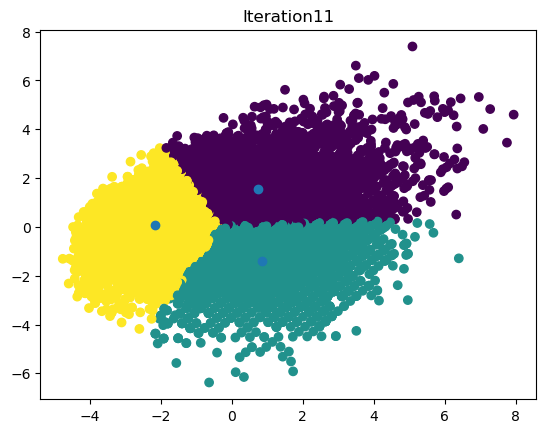

In [90]:
# write the body of Kmean algorithm
max_iterations=100  #number of times the algorithm will iterate unless the cluster stop first
k=3

centroids=random_centroids(data, k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

algorithm end at iteration 60. once it end you can look at the centroid to see what they represent

In [84]:
centroids
#we can use this to see what the centroid represent
#the 0 features is the middle of the distribution of 0 and 10
#the wage is high
#their overall and potential are high as well


,0,1,2,3,4
overall,4.011914,5.305913,2.503032,6.484409,4.328121
potential,4.016291,4.950001,4.455514,6.800155,5.912348
wage_eur,1.045248,1.178221,1.015908,1.688172,1.074859
value_eur,1.026961,1.061776,1.013544,1.457804,1.063587
age,4.487395,5.931729,2.272253,4.029306,2.659796


In [89]:
players[labels == 3][["short_name"]+features]  
#change the label to see those in different cluster
#This can be use to interpret it. 
#automatically categorize players in each group

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6265,Jaume Grau,69,78,10000.0,2900000.0,24
6270,C. Oliva,69,73,14000.0,1900000.0,25
6309,Patrick William,69,77,4000.0,2900000.0,24
6316,Bruno Duarte,69,74,6000.0,2100000.0,25


## We can compare this algorithm to the scikit learn



In [93]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(3)
kmeans.fit(data)


KMeans(n_clusters=3)

In [95]:
centroids = kmeans.cluster_centers_

In [96]:
pd.DataFrame(centroids,columns=features)

,overall,potential,wage_eur,value_eur,age
0,6.226290,6.620358,1.654877,1.412425,4.137418
1,3.596813,5.204622,1.039850,1.035691,2.710514
2,4.801093,4.503939,1.112960,1.040021,5.609717


https://www.youtube.com/watch?v=lX-3nGHDhQg